In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset
License(s): other
  0% 0.00/82.4k [00:00<?, ?B/s]
100% 82.4k/82.4k [00:00<00:00, 280MB/s]


In [ ]:
!unzip house-rent-prediction-dataset.zip > /dev/null

In [ ]:
!wc *.csv

  4747  35669 566961 House_Rent_Dataset.csv


Imports de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Análisis exploratorio

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv("House_Rent_Dataset.csv")

# Mostrar las primeras filas
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
# Información general del dataset
print("Forma del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())

# Estadísticas descriptivas básicas
df.describe(include='all').T


Forma del dataset: (4746, 12)

Tipos de datos:
Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

Valores faltantes:
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Posted On,4746,81,2022-07-06,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BHK,4746.0,NaN,NaN,NaN,2.08386,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,NaN,NaN,NaN,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,NaN,NaN,NaN,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Floor,4746,480,1 out of 2,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Type,4746,3,Super Area,2446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Locality,4746,2235,Bandra West,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,4746,6,Mumbai,972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Furnishing Status,4746,3,Semi-Furnished,2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenant Preferred,4746,3,Bachelors/Family,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN


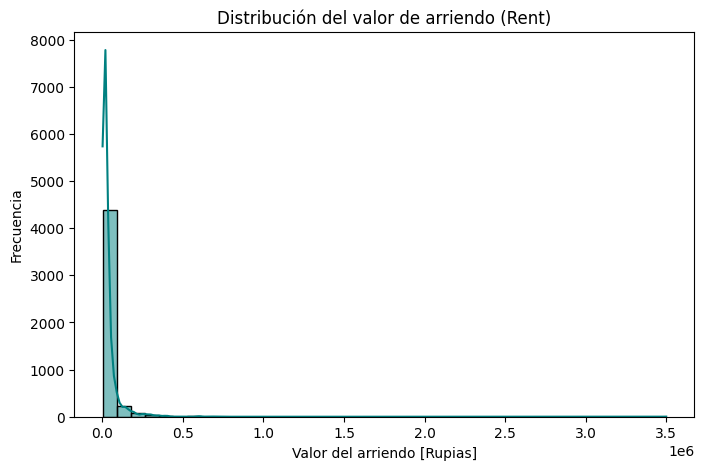

In [ ]:
# Distribución de la variable objetivo (Rent)
plt.figure(figsize=(8,5))
sns.histplot(df["Rent"], bins=40, kde=True, color='teal')
plt.title("Distribución del valor de arriendo (Rent)")
plt.xlabel("Valor del arriendo [Rupias]")
plt.ylabel("Frecuencia")
plt.show()


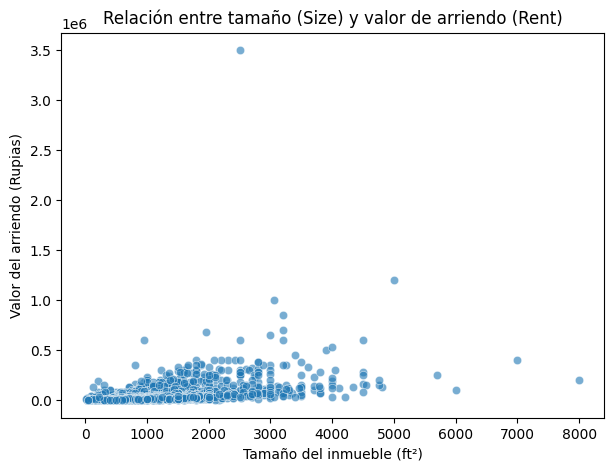

In [ ]:
# Relación entre tamaño y renta
plt.figure(figsize=(7,5))
sns.scatterplot(x="Size", y="Rent", data=df, alpha=0.6)
plt.title("Relación entre tamaño (Size) y valor de arriendo (Rent)")
plt.xlabel("Tamaño del inmueble (ft²)")
plt.ylabel("Valor del arriendo (Rupias)")
plt.show()


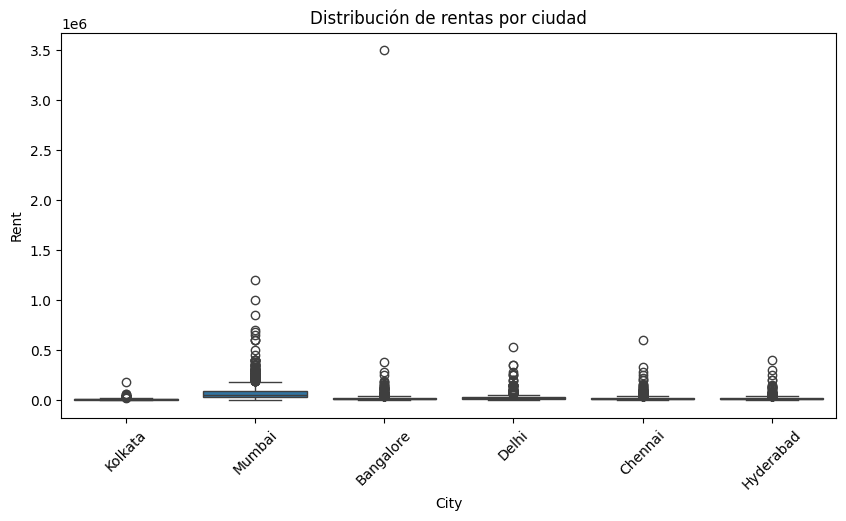

In [ ]:
# Distribución del arriendo por ciudad
plt.figure(figsize=(10,5))
sns.boxplot(x="City", y="Rent", data=df)
plt.title("Distribución de rentas por ciudad")
plt.xticks(rotation=45)
plt.show()


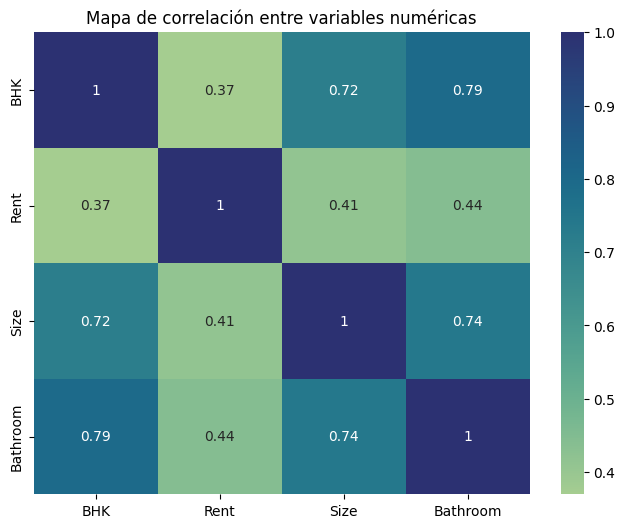

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

Limpieza de datos

In [ ]:
# Copia del dataset original
data = df.copy()

# Ver columnas y tipos de datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
# Limpieza básica de columnas de texto
# Eliminar espacios extra y se pone todo en minúsculas para uniformidad
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype(str).str.strip().str.lower()

# Revisar valores únicos en cada columna categórica
for col in data.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(data[col].unique()[:10])  # muestra los primeros 10 valores únicos



Posted On:
['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23']

Floor:
['ground out of 2' '1 out of 3' '1 out of 2' 'ground out of 1'
 'ground out of 4' '1 out of 4' '1 out of 1' 'ground out of 3'
 '2 out of 3' '4 out of 5']

Area Type:
['super area' 'carpet area' 'built area']

Area Locality:
['bandel' 'phool bagan, kankurgachi' 'salt lake city sector 2'
 'dumdum park' 'south dum dum' 'thakurpukur' 'malancha'
 'palm avenue kolkata, ballygunge' 'natunhat'
 'action area 1, rajarhat newtown']

City:
['kolkata' 'mumbai' 'bangalore' 'delhi' 'chennai' 'hyderabad']

Furnishing Status:
['unfurnished' 'semi-furnished' 'furnished']

Tenant Preferred:
['bachelors/family' 'bachelors' 'family']

Point of Contact:
['contact owner' 'contact agent' 'contact builder']


In [ ]:
# Manejo de columnas especiales

# La columna "Floor" tiene valores tipo "Ground out of 2" o "1 out of 5"
# Extraemos el número del piso actual y el total de pisos
def parse_floor(value):
    try:
        parts = value.split(" out of ")
        current = parts[0].strip().lower()
        total = parts[1].strip().lower() if len(parts) > 1 else current
        if current == "ground":
            current = 0
        elif current == "upper basement":
            current = -1
        elif current == "lower basement":
            current = -2
        else:
            current = int(current)

        if total == "ground":
            total = 0
        total = np.nan if pd.isna(total) else int(total)
        return pd.Series([current, total])

    except:
        return pd.Series([np.nan, np.nan])

data[["Current_Floor", "Total_Floors"]] = data["Floor"].apply(parse_floor)
data.drop(columns=["Floor"], inplace=True)

In [ ]:
# Revisar valores faltantes después de la conversión
print("Valores faltantes por columna:\n")
print(data.isnull().sum())
data.info()

Valores faltantes por columna:

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bat

In [ ]:
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Comprobamos el resultado
data.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current_Floor,Total_Floors
0,2022-05-18,2,10000,1100,2,bandel,4,2,1,2,2,0,2
1,2022-05-13,2,20000,800,2,"phool bagan, kankurgachi",4,1,1,1,2,1,3
2,2022-05-16,2,17000,1000,2,salt lake city sector 2,4,1,1,1,2,1,3
3,2022-07-04,2,10000,800,2,dumdum park,4,2,1,1,2,1,2
4,2022-05-09,2,7500,850,1,south dum dum,4,2,0,1,2,1,2


In [ ]:
# Revisar las variables finales y preparar X, y
target = "Rent"
X = data.drop(columns=[target])
y = data[target]

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (4746, 12)
Shape de y: (4746,)
